In [127]:
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

In [128]:
X = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])

In [129]:
affi_mtrx = X.dot(X.transpose())

In [130]:
affi_mtrx

array([[ 2,  3,  1, 11,  8,  9],
       [ 3,  5,  2, 15, 11, 12],
       [ 1,  2,  1,  4,  3,  3],
       [11, 15,  4, 65, 47, 54],
       [ 8, 11,  3, 47, 34, 39],
       [ 9, 12,  3, 54, 39, 45]])

In [131]:
clustering = SpectralClustering(n_clusters=2, 
                                affinity='precomputed',
                                assign_labels='discretize',
                                random_state=0).fit(affi_mtrx)

In [132]:
clustering.labels_

array([0, 1, 1, 0, 0, 0])

In [133]:
X

array([[1, 1],
       [2, 1],
       [1, 0],
       [4, 7],
       [3, 5],
       [3, 6]])

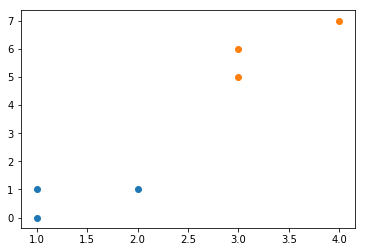

In [134]:
plt.scatter(X[:3, 0], X[:3, 1])
plt.scatter(X[3:, 0], X[3:, 1])

# example

In [101]:
def num_extrem_vals(ds):
    res = 0
    for i, d in enumerate(ds):
        if i == 0:
            if d > ds[1]:
                res += 1
        elif i == len(ds)-1:
            if d > ds[-2]:
                res += 1
        elif d > ds[i-1] and d > ds[i+1]:
            res += 1
    
    return res            

In [102]:
fname = 'incor-feval-lstm-1541384805.txt'
trees = []
extremes = []
trees_extremes = {}
with open(fname, 'r') as f:
    for line in f:
#         print(line.strip().split('\t'))
        idx, expr, ds, lbl, h = line.strip().split('\t')
        ds = [int(d) for d in ds.split()]
        nextremes = num_extrem_vals(ds)
        if nextremes not in trees_extremes:
            trees_extremes[nextremes] = []
        trees_extremes[nextremes].append(ds)
        extremes.append(nextremes)
        trees.append(ds) 

'a'

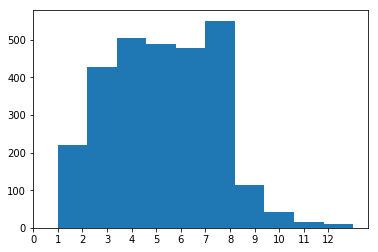

In [103]:
plt.hist(extremes)
plt.xticks(np.arange(0, 13, 1))
'a'

'a'

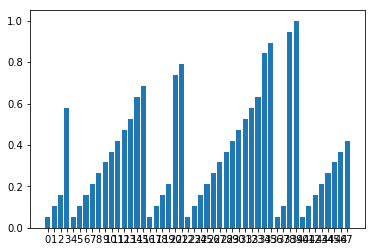

In [104]:
plt.bar(np.arange(len(trees[0])), np.array(trees[0])/max(trees[0]), label='syn-distance')
plt.xticks(np.arange(len(trees[0])))
'a'

In [105]:
def ed(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

print(ed("Helloworld", "HalloWorld"))

2


In [106]:
N = len(trees)
affi_mtrx = np.zeros((N, N))

In [107]:
# for i in range(N):
#     for j in range(N):
#         affi_mtrx[i, j] = ed(trees[i], trees[j])
#     print(i)

<BarContainer object of 46 artists>

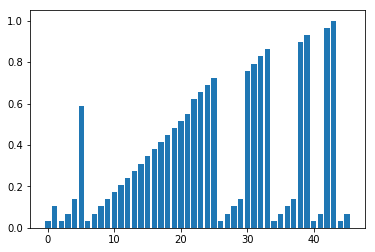

In [108]:
tree = trees_extremes[7][0]
plt.bar(np.arange(len(tree)), np.array(tree)/max(tree), label='syn-distance')

In [109]:
h_bins = list(range(2, 11)) + list(range(11, 30, 2)) + [30]

In [110]:
lines = []
extremes_total = []
hs_total = []
with open('../data/flang/test_d30_ef.tsv', 'r') as f:
    for line in f:
        expr, ds, h = line.strip().split('\t')
        ds = [int(d) for d in ds.split()]
        extremes_total.append(num_extrem_vals(ds))
        hs_total.append(int(h))
#         lines.append(line)

In [111]:
hist_ex_total, _ = np.histogram(extremes_total)
hist_h_total, _ = np.histogram(hs_total, bins=h_bins)

In [112]:
fname = 'incor-feval-lstm-1541384805.txt'
trees = []
extremes = []
hs = []
trees_extremes = {}
with open(fname, 'r') as f:
    for line in f:
        idx, expr, ds, lbl, h = line.strip().split('\t')
        ds = [int(d) for d in ds.split()]
        nextremes = num_extrem_vals(ds)
        if nextremes not in trees_extremes:
            trees_extremes[nextremes] = []
        trees_extremes[nextremes].append(ds)
        extremes.append(nextremes)
        hs.append(int(h))
        trees.append(ds)

In [113]:
hist_ex, _= np.histogram(extremes)
hist_h,_ = np.histogram(hs, bins=h_bins)

In [114]:
hist/hist_total

In [115]:
plt.bar(np.arange(len(hist))+1, hist/hist_total)
plt.xticks(np.arange(len(hist))+1)
plt.xlabel('#extremes')
plt.ylabel('ratio of wrong predictions')

NameError: name 'hist' is not defined

In [116]:
hist_h

array([  0,   1,   3,  34,  16,  81,  30, 102,  63, 142, 179, 196, 219,
       239, 272, 284, 329, 309, 355])

In [117]:
hist_h_total

array([1052, 1052, 1052, 1052, 1052, 1052, 1052, 1052, 1052, 1052, 1052,
       1052, 1052, 1052, 1052, 1052, 1052, 1052, 1052])

Text(0,0.5,'ratio of wrong predictions')

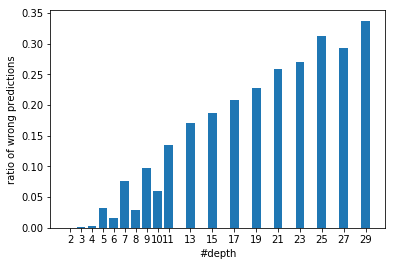

In [118]:
h_keys = np.array([2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 17, 19, 21, 23, 25,
        27, 29])
plt.bar(h_keys, hist_h/hist_h_total)
plt.xticks(h_keys)
plt.xlabel('#depth')
plt.ylabel('ratio of wrong predictions')

In [119]:
hist_h_total

array([1052, 1052, 1052, 1052, 1052, 1052, 1052, 1052, 1052, 1052, 1052,
       1052, 1052, 1052, 1052, 1052, 1052, 1052, 1052])

In [120]:
hist_h

array([  0,   1,   3,  34,  16,  81,  30, 102,  63, 142, 179, 196, 219,
       239, 272, 284, 329, 309, 355])

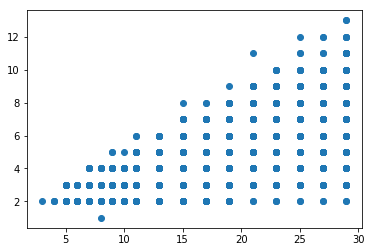

In [121]:
plt.scatter(hs, extremes)

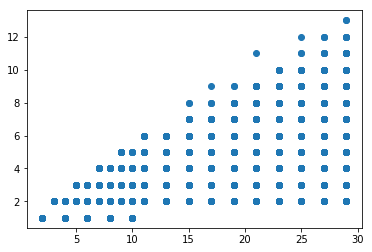

In [122]:
plt.scatter(hs_total, extremes_total)

In [135]:
def analy_incorrect(fname):
    extremes = []
    hs = []
    with open(fname, 'r') as f:
        for line in f:
            idx, expr, ds, lbl, h = line.strip().split('\t')
            ds = [int(d) for d in ds.split()]
            nextremes = num_extrem_vals(ds)
            extremes.append(nextremes)
            hs.append(int(h))
    
    fig, ax = plt.subplots()
    fig.dpi = 200
    hist_ex, _= np.histogram(extremes)
    hist_h,_ = np.histogram(hs, bins=h_bins)
    plt.bar(np.arange(len(hist_ex))+1, hist_ex/hist_ex_total, width=0.5, color='b', alpha=0.5, edgecolor="black")
    plt.xticks(np.arange(len(hist_ex))+1)
    plt.xlabel('#extremum')
    plt.ylabel('error rate')
    plt.grid(linewidth=1 ,linestyle='--', axis='y')
    plt.show()
    
    fig, ax = plt.subplots()
    fig.dpi = 200
    h_keys = np.array([2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 17, 19, 21, 23, 25,
        27, 29])
    plt.bar(h_keys[:10], (hist_h/hist_h_total)[:10], width=0.5, color='b', alpha=0.5, edgecolor="black")
    plt.xticks(h_keys[:10])
    plt.xlabel('depth')
    plt.ylabel('error rate')
    plt.grid(linewidth=1 ,linestyle='--', axis='y')
    plt.show()

In [156]:
def analy_incorrect(fname):
    extremes = []
    hs = []
    with open(fname, 'r') as f:
        for line in f:
            idx, expr, ds, lbl, h = line.strip().split('\t')
            ds = [int(d) for d in ds.split()]
            nextremes = num_extrem_vals(ds)
            extremes.append(nextremes)
            hs.append(int(h))
    
    fig, ax = plt.subplots()
    fig.dpi = 200
    hist_ex, _= np.histogram(extremes)
    hist_h,_ = np.histogram(hs, bins=h_bins)
    plt.bar(np.arange(len(hist_ex))+1, hist_ex/hist_ex_total, width=0.5, color='b', alpha=0.5, edgecolor="black", label='#extremum', lw=1)
    plt.bar(h_keys[:10]+0.5, (hist_h/hist_h_total)[:10], width=0.5, color='b', alpha=0.5, edgecolor="black", label='depth', lw=1)
    plt.xticks(np.arange(len(hist_ex))+1)
    plt.legend()
    plt.xlabel('#extremum/depth')
    plt.ylabel('error rate')
    plt.grid(linewidth=1 ,linestyle='--', axis='y')
    plt.show()
    
#     fig, ax = plt.subplots()
#     fig.dpi = 200
#     h_keys = np.array([2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 17, 19, 21, 23, 25,
#         27, 29])
#     plt.bar(h_keys[:10], (hist_h/hist_h_total)[:10], width=0.5, color='b', alpha=0.5, edgecolor="black")
#     plt.xticks(h_keys[:10])
#     plt.xlabel('depth')
#     plt.ylabel('error rate')
#     plt.grid(linewidth=1 ,linestyle='--', axis='y')
#     plt.show()

In [185]:
def analy_incorrect(fname):
    extremes = []
    hs = []
    with open(fname, 'r') as f:
        for line in f:
            idx, expr, ds, lbl, h = line.strip().split('\t')
            ds = [int(d) for d in ds.split()]
            nextremes = num_extrem_vals(ds)
            extremes.append(nextremes)
            hs.append(int(h))
    
    fig, ax = plt.subplots()
    fig.dpi = 200
    hist_ex, _= np.histogram(extremes)
    hist_h,_ = np.histogram(hs, bins=h_bins)
    
    plt.plot(np.arange(len(hist_ex))+1, hist_ex/hist_ex_total, 
             color='b', alpha=0.5, label='#extremum', marker='s', fillstyle='none')
    plt.plot(h_keys[:9], (hist_h/hist_h_total)[:9], color='r', 
             alpha=0.5, label='depth', marker='o', fillstyle='none')
    plt.xticks(np.arange(len(hist_ex))+1)
    plt.legend()
    plt.xlabel('#extremum/depth')
    plt.ylabel('error rate')
    plt.grid(linewidth=1 ,linestyle='--')
    plt.show()
    
#     fig, ax = plt.subplots()
#     fig.dpi = 200
#     h_keys = np.array([2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 17, 19, 21, 23, 25,
#         27, 29])
#     plt.bar(h_keys[:10], (hist_h/hist_h_total)[:10], width=0.5, color='b', alpha=0.5, edgecolor="black")
#     plt.xticks(h_keys[:10])
#     plt.xlabel('depth')
#     plt.ylabel('error rate')
#     plt.grid(linewidth=1 ,linestyle='--', axis='y')
#     plt.show()

# feval-lstm

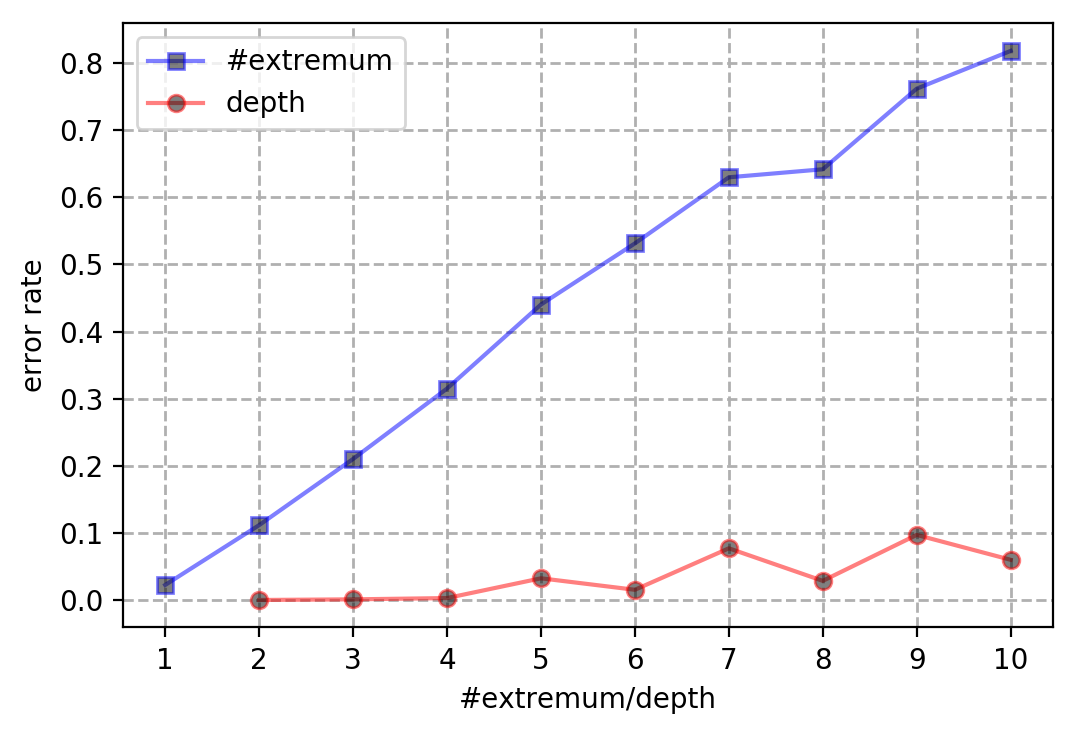

In [186]:
analy_incorrect('incor-feval-lstm-1541384805.txt')

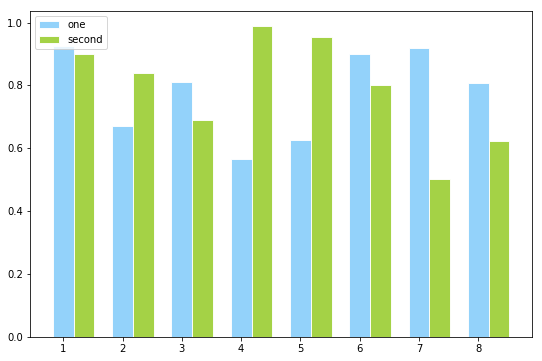

In [141]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(9,6))
n = 8
X = np.arange(n)+1 #X是1,2,3,4,5,6,7,8,柱的个数
#uniform均匀分布的随机数，normal是正态分布的随机数，0.5-1均匀分布的数，一共有n个
Y1 = np.random.uniform(0.5,1.0,n)
Y2 = np.random.uniform(0.5,1.0,n)
plt.bar(X, Y1, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='one', lw=1)
plt.bar(X+0.35, Y2, alpha=0.9, width = 0.35, facecolor = 'yellowgreen', edgecolor = 'white', label='second', lw=1)
plt.legend(loc="upper left") # label的位置在左上，没有这句会找不到label去哪了

# feval-alstm

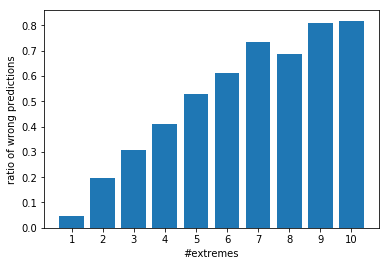

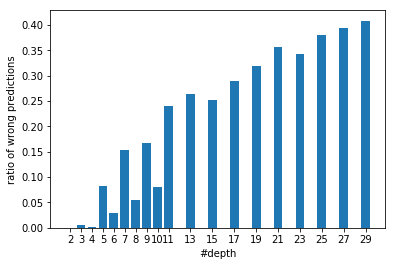

In [170]:
analy_incorrect('incor-feval-alstm-1541386252.txt')

# feval-srnn

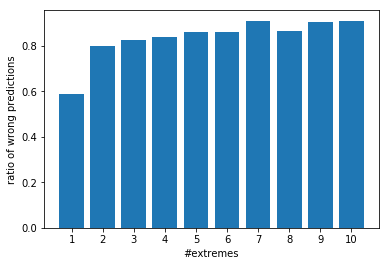

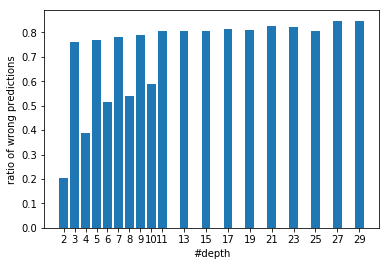

In [172]:
analy_incorrect('incor-feval-srnn-1541386417.txt')

# feval-ntm

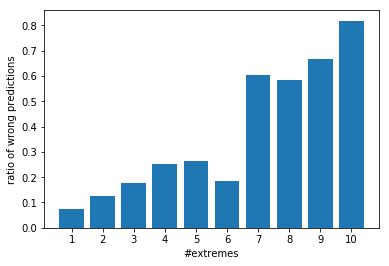

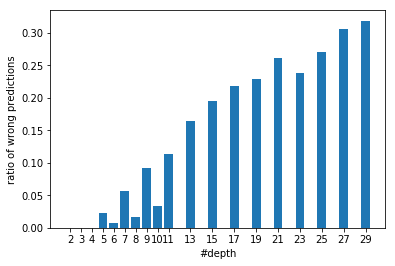

In [173]:
analy_incorrect('incor-feval-ntm-1541386390.txt')

# same h different \#extremes

In [178]:
extremes_total = {}
with open('../data/flang/test_d30_ef.tsv', 'r') as f:
    for line in f:
        expr, ds, h = line.strip().split('\t')
        h = int(h)
        if h not in extremes_total:
            extremes_total[h] = []
        extremes_total[h].append(num_extrem_vals(ds))

In [198]:
def diff_h_same_extremes(fname):
    extremes = {}
    with open(fname, 'r') as f:
        for line in f:
            idx, expr, ds, lbl, h = line.strip().split('\t')
            ds = [int(d) for d in ds.split()]
            h = int(h)
            nextremes = num_extrem_vals(ds)
            if h not in extremes:
                extremes[h] = []
            extremes[h].append(nextremes)

    return extremes

In [218]:
extremes = diff_h_same_extremes('incor-feval-alstm-1541386252.txt')
hists_extremes = {}
for n in extremes.keys():
    hists_extremes[n] = np.histogram(extremes[n], bins=np.arange(1,11,1))[0] /\
        (np.histogram(extremes_total[n], bins=np.arange(1,11,1))[0] + 0.1)

In [220]:
np.histogram(extremes[5], bins=np.arange(1,11,1))[0]

array([ 0, 72, 14,  0,  0,  0,  0,  0,  0])

In [228]:
sorted(extremes_total.keys())

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [235]:
extremes = {}
fname = 'incor-feval-alstm-1541386252.txt'
with open(fname, 'r') as f:
    for line in f:
        idx, expr, ds, lbl, h = line.strip().split('\t')
        ds = [int(d) for d in ds.split()]
        h = int(h)
        nextremes = num_extrem_vals(ds)
        if h not in extremes:
            extremes[h] = []
        extremes[h].append(nextremes)

'a'

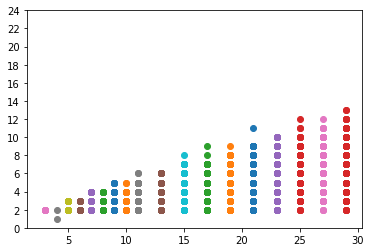

In [257]:
for h in extremes.keys():
    x = [h] * len(extremes[h])
    plt.scatter(x, extremes[h])
plt.yticks(np.arange(0,25, 2))
'a'

In [247]:
extremes_total = {}
with open('test_d30_ef.tsv', 'r') as f:
    for line in f:
        expr, ds, h = line.strip().split('\t')
        ds = [int(d) for d in ds.split()]
        h = int(h)
        if h not in extremes_total:
            extremes_total[h] = []
        extremes_total[h].append(num_extrem_vals(ds))

'a'

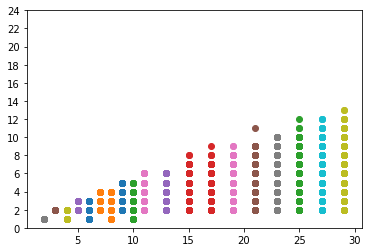

In [256]:
for h in extremes_total.keys():
    x = [h] * len(extremes_total[h])
    plt.scatter(x, extremes_total[h])
plt.yticks(np.arange(0,25, 2))
'a'

In [276]:
hist = np.histogram(extremes[29])[0]
len(hist)

10

In [277]:
hist_total = np.histogram(extremes_total[29])[0]
len(hist_total)

10

In [278]:
hist / hist_total

array([0.11255411, 0.25      , 0.43225806, 0.51234568, 0.50757576,
       0.67857143, 0.66666667, 0.625     , 0.76923077, 1.        ])

Text(0,0.5,'incorrect prediction%')

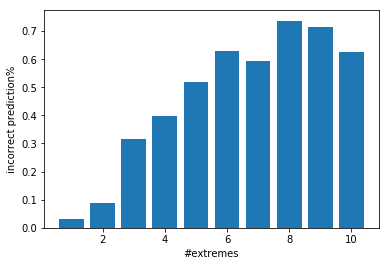

In [301]:
plt.bar(np.arange(1, 11), hist/hist_total)
plt.xlabel('#extremes')
plt.ylabel('incorrect prediction%')

In [302]:
def fixed_h(h):
    hist = np.histogram(extremes[h])[0]
    hist_total = np.histogram(extremes_total[h])[0]
    plt.bar(np.arange(1, 11), hisat/hist_total)
    plt.xlabel('#extremes')
    plt.ylabel('incorrect prediction%')
    return hist, hist_total

(array([26, 39, 67, 83, 67, 76, 40, 15, 10,  7]),
 array([231, 156, 155, 162, 132, 112,  60,  24,  13,   7]))

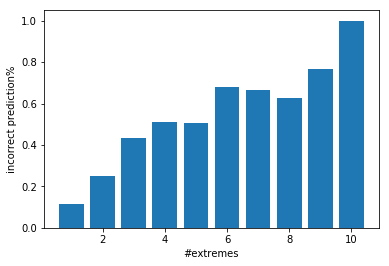

In [304]:
fixed_h(29)

(array([ 3, 14, 55, 65, 75, 88, 48, 42, 20,  5]),
 array([ 97, 158, 175, 163, 145, 140,  81,  57,  28,   8]))

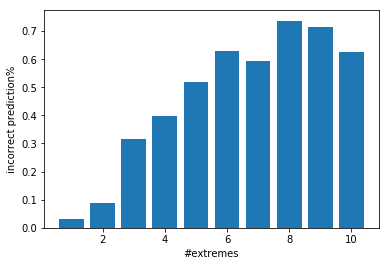

In [296]:
fixed_h(27)

(array([ 4, 31, 52, 74, 83, 74, 50, 24,  5,  3]),
 array([122, 177, 187, 179, 157, 115,  75,  29,   8,   3]))

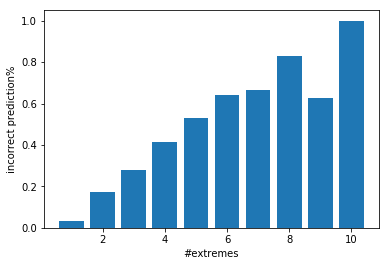

In [297]:
fixed_h(25)

/Users/marc/.pyenv/versions/3.6.4/envs/atec36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


(array([ 7, 40, 61, 61,  0, 84, 60, 26, 16,  6]),
 array([145, 188, 212, 172,   0, 153, 103,  50,  22,   7]))

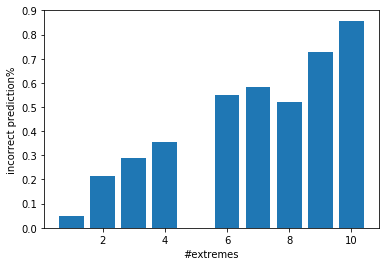

In [298]:
fixed_h(23)

/Users/marc/.pyenv/versions/3.6.4/envs/atec36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


(array([14, 49, 61, 91, 83, 49, 18,  9,  0,  1]),
 array([143, 234, 203, 210, 151,  73,  27,  10,   0,   1]))

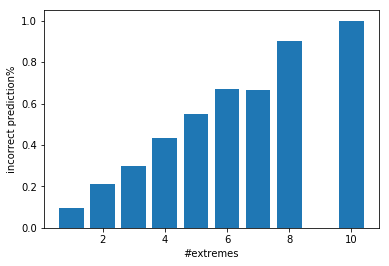

In [299]:
fixed_h(21)

# same \#extremes different h

In [353]:
h_bins = list(range(2, 11)) + list(range(11, 30, 2)) + [30]

In [319]:
hs_total = {}
with open('test_d30_ef.tsv', 'r') as f:
    for line in f:
        expr, ds, h = line.strip().split('\t')
        ds = [int(d) for d in ds.split()]
        h = int(h)
        ne = num_extrem_vals(ds)
        if ne not in hs_total:
            hs_total[ne] = []
        hs_total[ne].append(h)

In [322]:
hs = {}
fname = 'incor-feval-alstm-1541386252.txt'
with open(fname, 'r') as f:
    for line in f:
        idx, expr, ds, lbl, h = line.strip().split('\t')
        ds = [int(d) for d in ds.split()]
        h = int(h)
        ne = num_extrem_vals(ds)
        if ne not in hs:
            hs[ne] = []
        hs[ne].append(h)

In [354]:
h_ticks = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])
def fixed_ne(ne):
    hist = np.histogram(hs[ne], bins=h_bins)[0]
    hist_total = np.histogram(hs_total[ne], bins=h_bins)[0]
    plt.bar(np.array(range(len(hist/hist_total))), hist/hist_total)
    plt.xlabel('h')
    plt.ylabel('incorrect prediction%')
    return hist, hist_total

In [355]:
np.histogram(hs[2])[0]

array([ 79, 137,  75,  86,  25,  18,  28,   7,   4,   8])

In [356]:
np.histogram(hs_total[2])[0]

array([2109, 1333,  832,  655,  261,  195,  305,  145,  122,  197])

In [357]:
sorted(hs.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

/Users/marc/.pyenv/versions/3.6.4/envs/atec36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


(array([ 0,  6,  1, 72, 24, 93, 20, 49, 26, 54, 32, 25, 18, 14, 14,  7,  4,
         3,  5]),
 array([   0, 1052,  164,  893,  324,  689,  320,  497,  335,  375,  280,
         261,  195,  162,  143,  145,  122,   97,  100]))

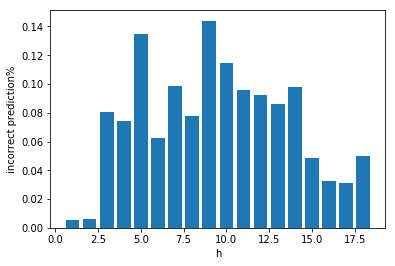

In [359]:
fixed_ne(2)

/Users/marc/.pyenv/versions/3.6.4/envs/atec36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


(array([  0,   0,   0,  14,   6,  61,  31,  84,  33, 104,  88,  66,  60,
         59,  49,  40,  31,  14,  21]),
 array([  0,   0,   0, 159,  58, 330, 144, 408, 185, 416, 372, 325, 304,
        257, 234, 188, 177, 158, 131]))

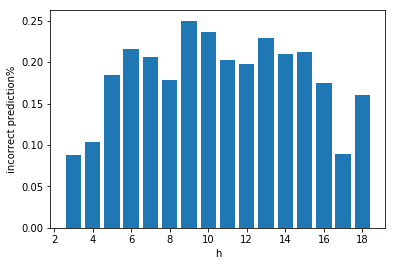

In [360]:
fixed_ne(3)

/Users/marc/.pyenv/versions/3.6.4/envs/atec36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


(array([ 0,  0,  0,  0,  0,  8,  6, 38, 23, 72, 92, 80, 81, 68, 61, 61, 52,
        55, 39]),
 array([  0,   0,   0,   0,   0,  33,  26, 137,  73, 200, 268, 262, 246,
        230, 203, 212, 187, 175, 156]))

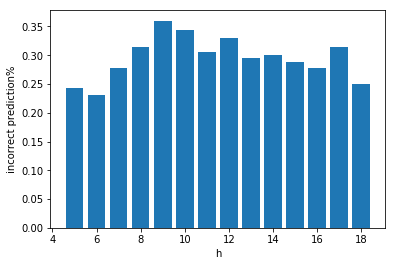

In [361]:
fixed_ne(4)

/Users/marc/.pyenv/versions/3.6.4/envs/atec36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


(array([ 0,  0,  0,  0,  0,  0,  0,  5,  2, 20, 57, 50, 68, 78, 91, 61, 74,
        65, 67]),
 array([  0,   0,   0,   0,   0,   0,   0,  10,   5,  54, 115, 127, 169,
        190, 210, 172, 179, 163, 155]))

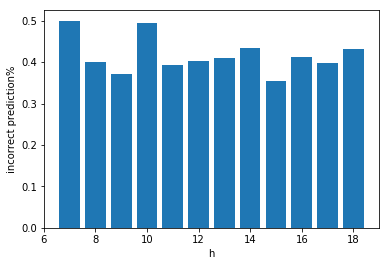

In [362]:
fixed_ne(5)

/Users/marc/.pyenv/versions/3.6.4/envs/atec36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9, 18, 42, 49, 60, 74,
        88, 67]),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,  35,
         57,  73, 103, 115, 140, 132]))

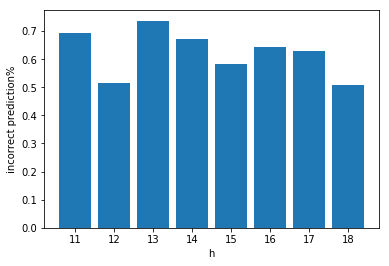

In [363]:
fixed_ne(7)

/Users/marc/.pyenv/versions/3.6.4/envs/atec36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  5,
        20, 15]),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  8,
        28, 24]))

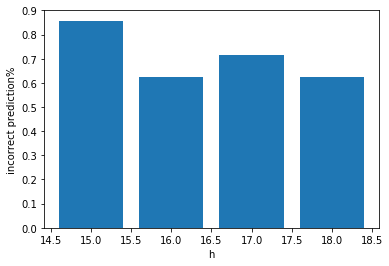

In [365]:
fixed_ne(10)